## **WhatsApp Chat Analysis using Python**

This notebook was built to analyze Whatsapp conversations using the steps below:
  * Step 1: Detecting {Date} and {Time} tokens
  * Step 2: Detecting the {Author} token
  * Step 3: Extracting and Combining tokens
  * Step 4: Parsing the entire file and handling Multi-Line Messages

> For further steps, we need to perform Exploratory data analysis (EDA)

  * Step 5: Performing EDA for analyzing chat data
  * Step 6: Overall statistics of WhatsApp chat including Total number of
  messages, media messages(Omitted) & Total number of URLs
  * Step 7: Extracting basic statistics for each Author (user)
  * Step 8: Word cloud of most used words in chat
  * Step 9: Total number of messages sent by each user
  * Step 10: Total messages sent on each day of the week
  * Step 11: Most active author of the chat
  * Step 12: Most active day in a week


> In next steps, Time series analysis will be performed on chat data

  * Step 13: Time whenever the chat was highly active 
  * Step 14: Date on which the chat was highly active
  * Step 15: Converting 12-hour formate to 24 hours will help us for better analysis
  * Step 16: Most suitable hour of the day whenever there will be more chances of getting a response from user



In [1]:
!pip install emoji
!pip install seaborn


# Import all necessory libraries

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import regex
import pandas as pd
import numpy as np
!pip install emoji
import emoji
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.ticker import MaxNLocator
from plotly import express as px
import seaborn as sns
from datetime import *
import datetime as dt

# Step 1: Detecting {Date} and {Time} tokens

In [4]:
def startsWithDate(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False


# Step 2: Detecting the {Author} token

In [5]:
def startsWithAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
        '([+]\d{2} \d{4} \d{7})'           # Mobile Number (Europe)
    ]
    pattern = '^' + '|'.join(patterns)
    result = regex.match(pattern, s)
    if result:
        return True
    return False

# Step 3: Extracting and Combining tokens

In [6]:
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if startsWithAuthor(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

# Step 4: Parsing the entire file and handling Multi-Line Messages

In [8]:
data = []
conversation = 'Updated_chat_data.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if startsWithDate(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

In [9]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])

c:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23/04/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/04/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26/04/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/04/2020' in DD/MM/YYYY format. Provide format or specify in

In [10]:
df

,Date,Time,Author,Message
0,2020-05-02,10:00 am,Ed,We share our knowledge here and pass year
1,2020-05-02,10:01 am,Ed,<Media omitted>
2,2020-05-02,10:01 am,Ed,Easy to communicate 🤣🤣🤣
3,2020-05-02,10:01 am,Rohit,💪🏾
4,2020-05-02,10:01 am,Rohit,yeah
...,...,...,...,...
4691,2020-09-20,5:32 pm,Ed,who have finish math lecture ?
4692,2020-09-21,2:25 pm,Ed,You deleted this message
4693,2020-09-21,2:26 pm,Ed,<Media omitted>
4694,2020-09-21,2:26 pm,Rohit,onz onz


In [11]:
df.tail(20)


,Date,Time,Author,Message
4676,2020-09-18,7:51 pm,Ed,😂 😂
4677,2020-09-18,7:51 pm,Rohit,She marking maybe
4678,2020-09-18,7:51 pm,Rohit,G3 few only marked right
4679,2020-09-18,7:51 pm,Rohit,I saw morning like 3 groups only
4680,2020-09-20,12:51 pm,Ed,<Media omitted>
4681,2020-09-20,12:52 pm,Ed,I see kk I can hidden it
4682,2020-09-20,12:53 pm,Rohit,Because we have shared alot private things her...
4683,2020-09-20,12:53 pm,Rohit,Np np
4684,2020-09-20,12:53 pm,Ed,OK Bro no worry
4685,2020-09-20,12:53 pm,Ed,@60183560200 can?


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4696 entries, 0 to 4695
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     4696 non-null   datetime64[ns]
 1   Time     4696 non-null   object        
 2   Author   4696 non-null   object        
 3   Message  4696 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 146.9+ KB


In [13]:
#----- Authors in the chat
df.Author.unique()

array(['Ed', 'Rohit'], dtype=object)

In [14]:
#------ Displaying total number of messeges in the chat
total_messages = df.shape[0]
print(total_messages)

4696


In [15]:
#----- Displaying omitted media while exporting
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

263


# ***Exploratory Data Analysis(EDA)***

# Step 5: Performing EDA for analyzing chat data

In [16]:
### ----------- Checking shape of dataset.
df.shape

### ---------- Checking basic information of dataset
df.info()

### ----------  Checking no. of null values in dataset
df.isnull().sum()

### ---------- Checking head part of dataset
df.head(20)

### -------- Checking tail part of dataset
df.tail(20)

### -------- Droping Nan values from dataset
df = df.dropna()
df = df.reset_index(drop=True)
df.shape

### --------- Checking no. of authors of group
df['Author'].nunique()

### --------- Checking authors of group
df['Author'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4696 entries, 0 to 4695
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     4696 non-null   datetime64[ns]
 1   Time     4696 non-null   object        
 2   Author   4696 non-null   object        
 3   Message  4696 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 146.9+ KB


array(['Ed', 'Rohit'], dtype=object)

In [17]:
###--------  Adding one more column of "Day" for better analysis, here we use datetime library which help us to do this task easily.
weeks = {
0 : 'Monday',
1 : 'Tuesday',
2 : 'Wednesday',
3 : 'Thrusday',
4 : 'Friday',
5 : 'Saturday',
6 : 'Sunday'
}
df['Day'] = df['Date'].dt.weekday.map(weeks)

### ----------- Rearranging the columns for better understanding
df = df[['Date','Day','Time','Author','Message']]

### ----------- Changing the datatype of column "Day".
df['Day'] = df['Day'].astype('category')

### ---------- Looking newborn dataset.
df.head()

### ---------- Counting number of letters in each message
df['Letter'] = df['Message'].apply(lambda s : len(s))

### ---------- Counting number of word's in each message
df['Word'] = df['Message'].apply(lambda s : len(s.split(' ')))

### ---------- Function to count number of links in dataset, it will add extra column and store information in it.
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

###--------- Function to count number of media in chat.
MEDIAPATTERN = r'<Media omitted>'
df['Media_Count'] = df.Message.apply(lambda x : regex.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df.Media_Count)

###------- Looking into updated dataset
df

,Date,Day,Time,Author,Message,Letter,Word,urlcount,Media_Count
0,2020-05-02,Saturday,10:00 am,Ed,We share our knowledge here and pass year,41,8,0,0
1,2020-05-02,Saturday,10:01 am,Ed,<Media omitted>,15,2,0,1
2,2020-05-02,Saturday,10:01 am,Ed,Easy to communicate 🤣🤣🤣,23,4,0,0
3,2020-05-02,Saturday,10:01 am,Rohit,💪🏾,2,1,0,0
4,2020-05-02,Saturday,10:01 am,Rohit,yeah,4,1,0,0
...,...,...,...,...,...,...,...,...,...
4691,2020-09-20,Sunday,5:32 pm,Ed,who have finish math lecture ?,30,6,0,0
4692,2020-09-21,Monday,2:25 pm,Ed,You deleted this message,24,4,0,0
4693,2020-09-21,Monday,2:26 pm,Ed,<Media omitted>,15,2,0,1
4694,2020-09-21,Monday,2:26 pm,Rohit,onz onz,7,2,0,0


# Step 6: Overall statistics of WhatsApp chat including Total number of messages, media messages(Omitted) & Total number of URLs

In [18]:
total_messages = df.shape[0]
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
links = np.sum(df.urlcount)
print('Personal Chat Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media_messages))
print('Total Number of Links : {}'.format(links))

Personal Chat Stats : 
Total Number of Messages : 4696
Total Number of Media Messages : 263
Total Number of Links : 17


# Step 7: Extracting basic statistics for each Author (user)

In [19]:
l = df.Author.unique()
for i in range(len(l)):
  ### -------Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]

  ### -------- req_df will contain messages of only one particular user
  print(f'--> Stats of {l[i]} <-- ')

  ### -------- shape will print number of rows which indirectly means the number of messages
  print('Total Message Sent : ', req_df.shape[0])

  ### -------- Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word']))/req_df.shape[0]
  w_p_m = ("%.3f" % round(words_per_message, 2))  
  print('Average Words per Message : ', w_p_m)

  ### -------- media conists of media messages
  media = sum(req_df["Media_Count"])
  print('Total Media Message Sent : ', media)

  ### ------- links consist of total links
  links = sum(req_df["urlcount"])   
  print('Total Links Sent : ', links)   
  print()
  print('----------------------------------------------------------n')

--> Stats of Ed <-- 
Total Message Sent :  2140
Average Words per Message :  3.890
Total Media Message Sent :  163
Total Links Sent :  4

----------------------------------------------------------n
--> Stats of Rohit <-- 
Total Message Sent :  2556
Average Words per Message :  5.610
Total Media Message Sent :  100
Total Links Sent :  13

----------------------------------------------------------n


In [20]:
#def split_count(text):
    #emoji_list = []
    #data = regex.findall(r'\X',text)
    #for word in data:
        #if any(char in emoji.UNICODE_EMOJI for char in word):
            #emoji_list.append(word)
    #return emoji_list
#df['emoji'] = df["Message"].apply(split_count)

#emojis = sum(df['emoji'].str.len())
#print(emojis)

In [21]:
#df.emoji


# Step 8: Word cloud of most used words in chat

SyntaxError: invalid syntax (1914088192.py, line 1)

In [42]:
### ------ Word Cloud of mostly used word in our Group
text = " ".join(review for review in df.Message)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

### ------ Display the generated image:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()







ValueError: Only supported for TrueType fonts

# Step 9: Total number of messages sent by each user

In [28]:
###------ Creates a list of unique Authors
l = df.Author.unique()

for i in range(len(l)):
  ###------ Filtering out messages of particular user
  req_df = df[df["Author"] == l[i]]

  ###------ req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Ed   ->   2140
Rohit   ->   2556


# Step 10: Total messages sent on each day of the week

In [29]:
l = df.Day.unique()
for i in range(len(l)):
  ### ------ Filtering out messages of particular user
  req_df = df[df["Day"] == l[i]]

  ###------- req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Saturday   ->   492
Tuesday   ->   996
Thrusday   ->   735
Sunday   ->   691
Wednesday   ->   1007
Friday   ->   546
Monday   ->   229


# Step 11: Most active author of the chat

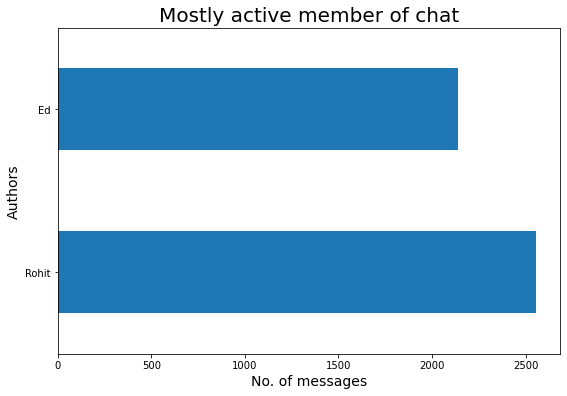

In [30]:
### ------ Most Active Author in the chat
plt.figure(figsize=(9,6))
author_value_counts = df['Author'].value_counts() #--- Number of messages per author
most_active = author_value_counts.head(10) #--- Number of messages per author for the  most active author
most_active.plot.barh() #--- Plot a bar chart using pandas built-in plotting apis

plt.xlabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of chat',fontdict={'fontsize': 20,'fontweight': 8})
plt.show()


# Step 12: Most active day in a week

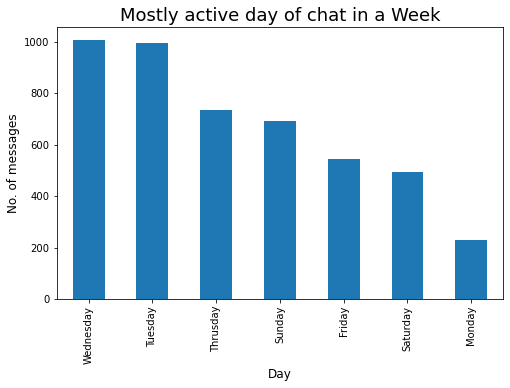

In [31]:
### ------ Mostly Active day in the chat
plt.figure(figsize=(8,5))
active_day = df['Day'].value_counts()

### ------ Most active author in the chat is : 
a_d = active_day.head(10)
a_d.plot.bar()
plt.xlabel('Day',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Mostly active day of chat in a Week',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

# ***Time series analysis***

# Step 13: Time whenever the chat was highly active 

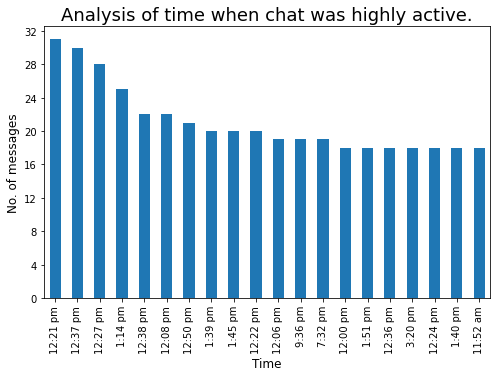

In [32]:
###------  Time whenever the chat is highly active
plt.figure(figsize=(8,5))
t = df['Time'].value_counts().head(20)
tx = t.plot.bar()
tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #----- Converting y axis data to integer
plt.xlabel('Time',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Analysis of time when chat was highly active.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

# Step 14: Date on which the chat was highly active

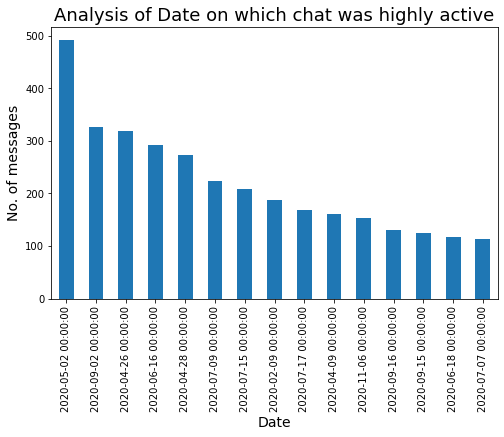

In [33]:
###---- Date on which the chat highly active.
plt.figure(figsize=(8,5))
df['Date'].value_counts().head(15).plot.bar()
plt.xlabel('Date',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Analysis of Date on which chat was highly active',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()

# Step 15: Converting 12-hour formate to 24 hours will help us for better analysis

In [34]:
lst = []
for i in df['Time']:
  out_time = datetime.strftime(datetime.strptime(i,"%I:%M %p"),"%H:%M")
  lst.append(out_time)
df['24H_Time'] = lst
df['Hours'] = df['24H_Time'].apply(lambda x : x.split(':')[0])

# Step 16: Most suitable hour of the day whenever there will be more chances of getting a response from user

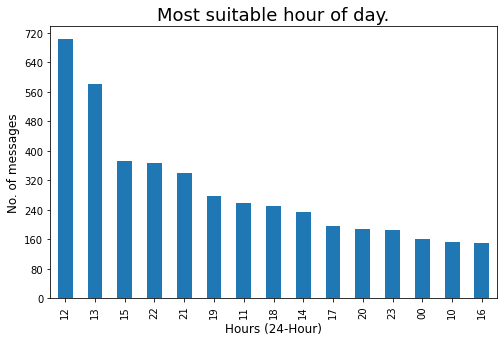

In [35]:
###------ Most suitable hour of day, whenever there will more chances of getting responce from group members.
plt.figure(figsize=(8,5))
std_time = df['Hours'].value_counts().head(15)
s_T = std_time.plot.bar()
s_T.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Hours (24-Hour)',fontdict={'fontsize': 12,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 12,'fontweight': 10})
plt.title('Most suitable hour of day.',fontdict={'fontsize': 18,'fontweight': 8})
plt.show()